### ASSIGNMENT 2 MARKETING CLASSIFIERS 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

### IMPORTING DATA 

In [4]:

file_path = "C:\\Users\\aravi\\OneDrive\\Desktop\\St Lawrence College Semesters\\Semester 3\\Data mining and machine Learning\\Telco-Customer-Churn Project.csv"
df = pd.read_csv(file_path)


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


In [11]:
target = df.pop('Churn')

In [30]:
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [12]:
## Define features

numeric_feature_names = ['gender', 'PhoneService', 'InternetService']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,gender,PhoneService,InternetService
0,0,0,0
1,1,1,0
2,1,1,0
3,1,0,0
4,0,1,1


In [13]:
# Convert data to Tensorflow tensor

numeric_features = tf.convert_to_tensor(numeric_features)
numeric_features

<tf.Tensor: shape=(7043, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])>

In [14]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [15]:
# Define model

def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3) # Possible labels 0, 1 or 2
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                # loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [16]:
# Train model

BATCH_SIZE = 128

model = get_basic_model()
model.fit(numeric_features, target, epochs=500, batch_size=BATCH_SIZE)

Epoch 1/500
56/56 [==============================] - 1s 1ms/step - loss: 1.1504 - accuracy: 0.3805
Epoch 2/500
56/56 [==============================] - 0s 1ms/step - loss: 0.9084 - accuracy: 0.6861
Epoch 3/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7943 - accuracy: 0.7219
Epoch 4/500
56/56 [==============================] - 0s 1ms/step - loss: 0.7313 - accuracy: 0.7346
Epoch 5/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.7346
Epoch 6/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.7346
Epoch 7/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.7346
Epoch 8/500
56/56 [==============================] - 0s 1ms/step - loss: 0.6019 - accuracy: 0.7346
Epoch 9/500
56/56 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7346
Epoch 10/500
56/56 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7346
Epoch 11/

In [17]:
# Download test data
df_test1 = pd.read_csv( "C:\\Users\\aravi\\OneDrive\\Desktop\\St Lawrence College Semesters\\Semester 3\\Data mining and machine Learning\\Telco-Customer-Churn Project.csv")
df_test1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Pop label

test_target = df_test1.pop('Churn')

In [19]:
le = LabelEncoder()
df_test = df_test1.apply(le.fit_transform)

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int32
 1   gender            7043 non-null   int32
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int32
 4   Dependents        7043 non-null   int32
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int32
 7   MultipleLines     7043 non-null   int32
 8   InternetService   7043 non-null   int32
 9   OnlineSecurity    7043 non-null   int32
 10  OnlineBackup      7043 non-null   int32
 11  DeviceProtection  7043 non-null   int32
 12  TechSupport       7043 non-null   int32
 13  StreamingTV       7043 non-null   int32
 14  StreamingMovies   7043 non-null   int32
 15  Contract          7043 non-null   int32
 16  PaperlessBilling  7043 non-null   int32
 17  PaymentMethod     7043 non-null  

In [21]:
# Define test features

test_numeric_feature_names = ['gender', 'PhoneService', 'InternetService']
test_numeric_features = df_test[test_numeric_feature_names]
test_numeric_features.head()

,gender,PhoneService,InternetService
0,0,0,0
1,1,1,0
2,1,1,0
3,1,0,0
4,0,1,1


In [22]:
# Convert test data to Tensorflow tensor

test_numeric_features = tf.convert_to_tensor(test_numeric_features)
test_numeric_features

<tf.Tensor: shape=(7043, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])>

In [23]:
# Normalize data

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(test_numeric_features)

In [28]:
test_numeric_features

<tf.Tensor: shape=(7043, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])>

In [29]:
test_target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [31]:
# Evaluate test data based on training data

score = model.evaluate(test_numeric_features, target, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

221/221 [==============================] - 0s 872us/step - loss: 0.5215 - accuracy: 0.7346
Test loss: 0.5215473771095276 / Test accuracy: 0.7346301078796387


In [ ]:
columns_to_select = ["gender", "PhoneService", "InternetService"]
df_predict = df[columns_to_select].copy()

In [53]:
df_predict

,gender,PhoneService,InternetService
0,0,0,0
1,1,1,0
2,1,1,0
3,1,0,0
4,0,1,1
...,...,...,...
7038,1,1,0
7039,0,1,1
7040,0,0,0
7041,1,1,1


In [54]:
# Make sure data types are correct (no objects)

df_predict.dtypes

gender             int32
PhoneService       int32
InternetService    int32
dtype: object

In [55]:
# Convert data to Tensorflow tensor

predict_numeric_features = tf.convert_to_tensor(df_predict)
predict_numeric_features

<tf.Tensor: shape=(7043, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])>

In [56]:
# Normalize

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(predict_numeric_features)


In [47]:
normalizer

In [57]:
# Predict labels

class_names = ['Yes', 'No']

predictions = model(predict_numeric_features, training=False)

# Create new columns in dataframe
df_predict['label'] = None
df_predict['certainty'] = None

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

  # Save predictions to dataframe
  df_predict["label"].iloc[i] = name
  df_predict['certainty'].iloc[i] = format(p)

Example 0 prediction: Yes (75.3%)
Example 1 prediction: Yes (82.5%)
Example 2 prediction: Yes (82.5%)
Example 3 prediction: Yes (74.3%)
Example 4 prediction: Yes (57.4%)
Example 5 prediction: Yes (57.4%)
Example 6 prediction: Yes (58.0%)
Example 7 prediction: Yes (75.3%)
Example 8 prediction: Yes (57.4%)
Example 9 prediction: Yes (82.5%)
Example 10 prediction: Yes (82.5%)
Example 11 prediction: Yes (92.1%)
Example 12 prediction: Yes (58.0%)
Example 13 prediction: Yes (58.0%)
Example 14 prediction: Yes (58.0%)
Example 15 prediction: Yes (57.4%)
Example 16 prediction: Yes (91.9%)
Example 17 prediction: Yes (58.0%)
Example 18 prediction: Yes (83.8%)
Example 19 prediction: Yes (57.4%)
Example 20 prediction: Yes (74.3%)
Example 21 prediction: Yes (92.1%)
Example 22 prediction: Yes (92.1%)
Example 23 prediction: Yes (83.8%)
Example 24 prediction: Yes (82.5%)
Example 25 prediction: Yes (83.8%)
Example 26 prediction: Yes (58.0%)
Example 27 prediction: Yes (74.3%)
Example 28 prediction: Yes (82

C:\Users\aravi\AppData\Local\Temp\ipykernel_42552\2787309659.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict["label"].iloc[i] = name
C:\Users\aravi\AppData\Local\Temp\ipykernel_42552\2787309659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['certainty'].iloc[i] = format(p)


Example 231 prediction: Yes (58.0%)
Example 232 prediction: Yes (58.0%)
Example 233 prediction: Yes (91.9%)
Example 234 prediction: Yes (91.9%)
Example 235 prediction: Yes (82.5%)
Example 236 prediction: Yes (75.3%)
Example 237 prediction: Yes (58.0%)
Example 238 prediction: Yes (57.4%)
Example 239 prediction: Yes (92.1%)
Example 240 prediction: Yes (83.8%)
Example 241 prediction: Yes (58.0%)
Example 242 prediction: Yes (83.8%)
Example 243 prediction: Yes (57.4%)
Example 244 prediction: Yes (83.8%)
Example 245 prediction: Yes (58.0%)
Example 246 prediction: Yes (82.5%)
Example 247 prediction: Yes (58.0%)
Example 248 prediction: Yes (82.5%)
Example 249 prediction: Yes (58.0%)
Example 250 prediction: Yes (57.4%)
Example 251 prediction: Yes (57.4%)
Example 252 prediction: Yes (74.3%)
Example 253 prediction: Yes (82.5%)
Example 254 prediction: Yes (92.1%)
Example 255 prediction: Yes (75.3%)
Example 256 prediction: Yes (57.4%)
Example 257 prediction: Yes (58.0%)
Example 258 prediction: Yes 

In [58]:
df_predict

,gender,PhoneService,InternetService,label,certainty
0,0,0,0,Yes,0.7525807023048401
1,1,1,0,Yes,0.8246576189994812
2,1,1,0,Yes,0.8246576189994812
3,1,0,0,Yes,0.7427869439125061
4,0,1,1,Yes,0.5738554000854492
...,...,...,...,...,...
7038,1,1,0,Yes,0.8246576189994812
7039,0,1,1,Yes,0.5738554000854492
7040,0,0,0,Yes,0.7525807023048401
7041,1,1,1,Yes,0.5798401832580566


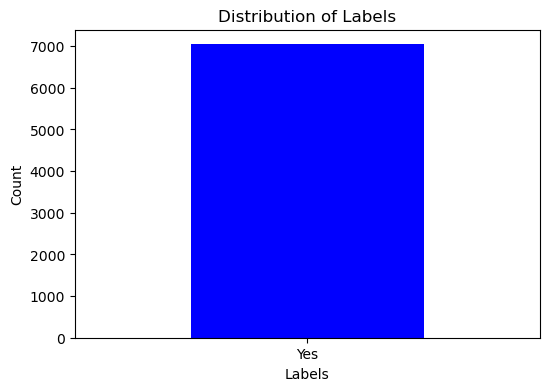

In [61]:
#Count the occurrences of each label
label_counts = df_predict['label'].value_counts()

# Create a bar graph
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()